In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from functools import reduce
import seaborn as sns
from sklearn.ensemble import IsolationForest,RandomForestRegressor,GradientBoostingRegressor

In [2]:
df1=pd.read_csv('blane_before_hpgr.csv')

In [3]:
df1.insert(loc=0, column='new_date', value=df1['Date']+' '+df1['Time'])

In [6]:
df1['new_date']=pd.to_datetime(df1['new_date'],format='%m/%d/%Y %H:%M:%S')
df1['new_date']=df1['new_date']-timedelta( minutes=0, hours=7)
df1['new_date']=df1['new_date'].dt.date
df1.drop(['Date','Time'],axis=1,inplace=True)
df1 = df1.ffill()
df1=df1.groupby(['new_date']).mean()


In [8]:
df1.head(50)

,Blane_before_hpgr
new_date,
2019-03-20,1721.000000
2019-03-21,1677.000000
2019-03-22,1664.166667
2019-03-23,1664.307692
2019-03-24,1640.000000
2019-03-25,1618.222222
2019-03-26,1640.090909
2019-03-27,1622.909091
2019-03-28,1593.916667


In [9]:
df2=pd.read_csv('blane_after_hpgr.csv')

In [10]:
df2.insert(loc=0, column='new_date', value=df2['Date']+' '+df2['Time'])

In [12]:
df2['new_date']=pd.to_datetime(df2['new_date'],format='%m/%d/%Y %H:%M:%S')
df2['new_date']=df2['new_date']-timedelta( minutes=0, hours=7)
df2['new_date']=df2['new_date'].dt.date
df2.drop(['Date','Time'],axis=1,inplace=True)
df2 = df2.ffill()
df2=df2.groupby(['new_date']).mean()


In [14]:
df2.head(20)

,Blane_after_hpgr
new_date,
2019-03-20,1917.000000
2019-03-21,1875.416667
2019-03-22,1944.333333
2019-03-23,2014.000000
2019-03-24,2036.909091
2019-03-25,2028.555556
2019-03-26,2034.181818
2019-03-27,2027.181818
2019-03-28,1998.500000


In [16]:
df3=pd.read_csv('area600.csv')

In [17]:
df3.insert(loc=0, column='new_date', value=df3['Date']+' '+df3['Time'])

In [19]:
df3['new_date']=pd.to_datetime(df3['new_date'],format='%m/%d/%Y %H:%M')
df3['new_date']=df3['new_date']-timedelta( minutes=0, hours=7)
df3['new_date']=df3['new_date'].dt.date
df3.drop(['Date','Time'],axis=1,inplace=True)
df3 = df3.ffill()
df3=df3.groupby(['new_date']).mean()

In [20]:
df3.head(20)

,MC%,Drop
new_date,,
2019-03-20,9.333333,4.545556
2019-03-21,9.037838,3.724865
2019-03-22,9.068056,4.198194
2019-03-23,8.997183,4.894366
2019-03-24,8.795833,4.649583
2019-03-25,8.860175,4.487368
2019-03-26,9.001493,5.343582
2019-03-27,8.844286,4.473714
2019-03-28,8.850000,4.608088


In [88]:
df4=pd.read_csv('row-data.csv')
df4.head(20)

,Date,710FN3_Damper(%),Water_Mix1(m3/h),Water_Mix2(m3/h),Kiln_Speed(rpm),710FN1_Damper(%),730FN1_Damper(%),Grate_Feed(ton),OffGas(deg),WF5(t/h),WF6(t/h),Grate_Speed(rpm)
0,22/03/2019,34.56,3.77,2.85,1.72,51.00,32.50,12383.61,827.97,14.54,19.03,6.20
1,23/03/2019,34.01,5.68,2.77,1.72,51.98,31.96,12413.71,847.22,17.42,16.49,5.98
2,24/03/2019,28.01,5.07,3.07,1.72,46.90,31.49,12277.02,844.50,17.58,18.08,5.98
3,25/03/2019,26.59,3.48,3.28,1.71,39.30,26.14,9942.13,834.06,10.72,11.61,4.72
4,26/03/2019,34.39,4.49,4.48,1.72,48.12,32.16,12960.56,805.14,17.68,17.76,6.13
5,27/03/2019,31.53,3.69,3.68,1.72,43.85,30.43,11750.39,840.66,11.45,11.58,5.49
6,28/03/2019,38.36,3.44,3.23,1.72,46.31,31.87,12608.12,844.28,18.81,17.56,5.77
7,29/03/2019,34.20,4.10,3.98,1.72,49.28,32.55,13349.91,815.68,17.70,21.29,6.06
8,30/03/2019,38.57,3.91,3.88,1.72,51.58,32.64,13318.52,810.32,18.51,18.55,6.04
9,31/03/2019,37.00,3.26,3.25,1.72,50.00,32.43,13130.03,819.98,18.45,18.51,5.99


In [89]:
df4['Date']=pd.to_datetime(df4['Date'],format='%d/%m/%Y')
df4['Date']=df4['Date'].dt.date
df4.rename(columns={'Date' : 'new_date'}, inplace=True)
df4 = df4.ffill()
df4=df4.groupby(['new_date']).mean()

In [90]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1067 entries, 2019-03-22 to 2022-02-20
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   710FN3_Damper(%)  1067 non-null   float64
 1   Water_Mix1(m3/h)  1067 non-null   float64
 2   Water_Mix2(m3/h)  1067 non-null   float64
 3   Kiln_Speed(rpm)   1067 non-null   float64
 4   710FN1_Damper(%)  1067 non-null   float64
 5   730FN1_Damper(%)  1067 non-null   float64
 6   Grate_Feed(ton)   1067 non-null   float64
 7   OffGas(deg)       1067 non-null   float64
 8   WF5(t/h)          1067 non-null   float64
 9   WF6(t/h)          1067 non-null   float64
 10  Grate_Speed(rpm)  1067 non-null   float64
dtypes: float64(11)
memory usage: 100.0+ KB


In [91]:
df5=pd.read_csv('area700.csv')

In [92]:
df5.insert(loc=0, column='new_date', value=df5['Date']+' '+df5['Time'])

In [93]:
df5['new_date']=pd.to_datetime(df5['new_date'],format='%m/%d/%Y %H:%M')
df5['new_date']=df5['new_date']-timedelta( minutes=0, hours=7)
df5['new_date']=df5['new_date'].dt.date
df5.drop(['Date','Time'],axis=1,inplace=True)
df5 = df5.ffill()
df5=df5.groupby(['new_date']).mean()

In [94]:
df5.head(20)

,FeO,P_9-16_mm
new_date,,
2019-03-20,0.820000,89.393333
2019-03-21,0.743333,89.552500
2019-03-22,0.721667,86.938333
2019-03-23,0.786667,87.138333
2019-03-24,0.660000,86.723333
2019-03-25,0.764444,88.310000
2019-03-26,0.853333,88.649167
2019-03-27,1.063333,88.657500
2019-03-28,0.750833,87.730833


In [95]:
data_frames = [df1, df2, df3,df4,df5]
df = reduce(lambda  left,right: pd.merge(left,right,on=['new_date'],how='outer'), data_frames)

In [96]:
df.head(20)

,Blane_before_hpgr,Blane_after_hpgr,MC%,Drop,710FN3_Damper(%),Water_Mix1(m3/h),Water_Mix2(m3/h),Kiln_Speed(rpm),710FN1_Damper(%),730FN1_Damper(%),Grate_Feed(ton),OffGas(deg),WF5(t/h),WF6(t/h),Grate_Speed(rpm),FeO,P_9-16_mm
new_date,,,,,,,,,,,,,,,,,
2019-03-20,1721.000000,1917.000000,9.333333,4.545556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.820000,89.393333
2019-03-21,1677.000000,1875.416667,9.037838,3.724865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743333,89.552500
2019-03-22,1664.166667,1944.333333,9.068056,4.198194,34.56,3.77,2.85,1.72,51.00,32.50,12383.61,827.97,14.54,19.03,6.20,0.721667,86.938333
2019-03-23,1664.307692,2014.000000,8.997183,4.894366,34.01,5.68,2.77,1.72,51.98,31.96,12413.71,847.22,17.42,16.49,5.98,0.786667,87.138333
2019-03-24,1640.000000,2036.909091,8.795833,4.649583,28.01,5.07,3.07,1.72,46.90,31.49,12277.02,844.50,17.58,18.08,5.98,0.660000,86.723333
2019-03-25,1618.222222,2028.555556,8.860175,4.487368,26.59,3.48,3.28,1.71,39.30,26.14,9942.13,834.06,10.72,11.61,4.72,0.764444,88.310000
2019-03-26,1640.090909,2034.181818,9.001493,5.343582,34.39,4.49,4.48,1.72,48.12,32.16,12960.56,805.14,17.68,17.76,6.13,0.853333,88.649167
2019-03-27,1622.909091,2027.181818,8.844286,4.473714,31.53,3.69,3.68,1.72,43.85,30.43,11750.39,840.66,11.45,11.58,5.49,1.063333,88.657500
2019-03-28,1593.916667,1998.500000,8.850000,4.608088,38.36,3.44,3.23,1.72,46.31,31.87,12608.12,844.28,18.81,17.56,5.77,0.750833,87.730833


In [97]:
df = df.ffill()

In [98]:
df.dropna(how='any',axis=0,inplace=True)

In [99]:
df=df[(df['Grate_Feed(ton)'] >9500) & (df['Grate_Feed(ton)'] <14000) ]

In [100]:
df

,Blane_before_hpgr,Blane_after_hpgr,MC%,Drop,710FN3_Damper(%),Water_Mix1(m3/h),Water_Mix2(m3/h),Kiln_Speed(rpm),710FN1_Damper(%),730FN1_Damper(%),Grate_Feed(ton),OffGas(deg),WF5(t/h),WF6(t/h),Grate_Speed(rpm),FeO,P_9-16_mm
new_date,,,,,,,,,,,,,,,,,
2019-03-22,1664.166667,1944.333333,9.068056,4.198194,34.56,3.77,2.85,1.72,51.00,32.50,12383.61,827.97,14.54,19.03,6.20,0.721667,86.938333
2019-03-23,1664.307692,2014.000000,8.997183,4.894366,34.01,5.68,2.77,1.72,51.98,31.96,12413.71,847.22,17.42,16.49,5.98,0.786667,87.138333
2019-03-24,1640.000000,2036.909091,8.795833,4.649583,28.01,5.07,3.07,1.72,46.90,31.49,12277.02,844.50,17.58,18.08,5.98,0.660000,86.723333
2019-03-25,1618.222222,2028.555556,8.860175,4.487368,26.59,3.48,3.28,1.71,39.30,26.14,9942.13,834.06,10.72,11.61,4.72,0.764444,88.310000
2019-03-26,1640.090909,2034.181818,9.001493,5.343582,34.39,4.49,4.48,1.72,48.12,32.16,12960.56,805.14,17.68,17.76,6.13,0.853333,88.649167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-12,1502.166667,1698.083333,8.997333,3.736800,44.69,2.28,2.27,1.54,59.68,47.78,13390.01,864.99,25.82,25.78,6.54,0.860000,92.276667
2022-02-20,1521.454545,1854.272727,8.768852,4.075574,42.15,2.10,2.10,1.11,47.50,33.90,11394.76,934.31,13.97,14.04,4.47,0.455000,94.103333
2022-02-21,1500.700000,1867.700000,8.647500,4.196625,42.15,2.10,2.10,1.11,47.50,33.90,11394.76,934.31,13.97,14.04,4.47,0.760833,93.305833


<AxesSubplot:title={'center':'Grate Feed (ton)'}, xlabel='new_date', ylabel='Grate_Speed(rpm)'>

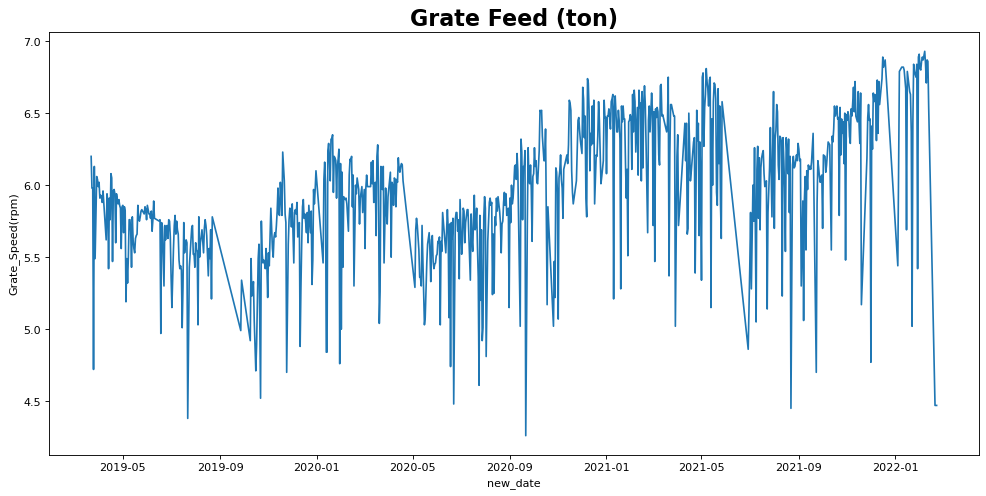

In [101]:
plt.figure(figsize=(15,7),dpi=80)
plt.title('Grate Feed (ton)', fontsize=20,fontweight='bold')
sns.lineplot(x=df.index, y=df['Grate_Speed(rpm)'], data=df )

In [102]:
df.describe()

,Blane_before_hpgr,Blane_after_hpgr,MC%,Drop,710FN3_Damper(%),Water_Mix1(m3/h),Water_Mix2(m3/h),Kiln_Speed(rpm),710FN1_Damper(%),730FN1_Damper(%),Grate_Feed(ton),OffGas(deg),WF5(t/h),WF6(t/h),Grate_Speed(rpm),FeO,P_9-16_mm
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,1627.518160,1923.562320,9.040327,4.287518,42.926508,3.460083,3.515364,1.627318,54.189809,37.747235,12651.698915,857.799321,15.726138,15.938081,5.952348,0.875073,87.301222
std,131.291492,135.675218,0.184341,0.574697,4.952149,1.221877,1.293577,0.088522,5.914216,4.873016,780.567514,50.485034,5.825278,5.746571,0.475850,0.285821,2.035960
min,1278.400000,1547.444444,8.516438,2.791781,26.590000,0.540000,0.400000,1.110000,23.950000,26.140000,9646.270000,625.750000,0.000000,0.000000,4.260000,0.386667,80.936667
25%,1523.314394,1828.436364,8.916438,3.881389,39.205000,2.640000,2.630000,1.550000,50.105000,35.040000,12327.935000,821.510000,12.480000,12.635000,5.670000,0.677500,86.027083
50%,1638.454545,1913.000000,9.034722,4.271389,44.160000,3.450000,3.450000,1.660000,54.110000,36.530000,12803.210000,858.120000,16.820000,16.840000,5.950000,0.816364,87.351818
75%,1732.000000,2010.681818,9.164545,4.605919,46.715000,4.220000,4.290000,1.700000,58.285000,37.815000,13131.180000,893.750000,19.955000,20.020000,6.290000,1.000000,88.570000
max,1918.300000,2288.666667,9.681429,6.497568,53.210000,7.330000,7.460000,1.780000,74.720000,50.480000,13997.600000,983.240000,30.220000,29.940000,6.930000,2.739286,94.103333


In [103]:
col=df.columns
data=df.values
idx=df.index.values

In [104]:
iso = IsolationForest()
yhat = iso.fit_predict(data)
yhat.shape

(839,)

In [105]:
# select all rows that are not outliers
mask = yhat != -1
mask.shape

(839,)

In [106]:
data = data[mask, :]
idx = idx[mask]

In [107]:
df=pd.DataFrame(data,columns=col,index=idx)
df

,Blane_before_hpgr,Blane_after_hpgr,MC%,Drop,710FN3_Damper(%),Water_Mix1(m3/h),Water_Mix2(m3/h),Kiln_Speed(rpm),710FN1_Damper(%),730FN1_Damper(%),Grate_Feed(ton),OffGas(deg),WF5(t/h),WF6(t/h),Grate_Speed(rpm),FeO,P_9-16_mm
2019-03-22,1664.166667,1944.333333,9.068056,4.198194,34.56,3.77,2.85,1.72,51.00,32.50,12383.61,827.97,14.54,19.03,6.20,0.721667,86.938333
2019-03-23,1664.307692,2014.000000,8.997183,4.894366,34.01,5.68,2.77,1.72,51.98,31.96,12413.71,847.22,17.42,16.49,5.98,0.786667,87.138333
2019-03-24,1640.000000,2036.909091,8.795833,4.649583,28.01,5.07,3.07,1.72,46.90,31.49,12277.02,844.50,17.58,18.08,5.98,0.660000,86.723333
2019-03-26,1640.090909,2034.181818,9.001493,5.343582,34.39,4.49,4.48,1.72,48.12,32.16,12960.56,805.14,17.68,17.76,6.13,0.853333,88.649167
2019-03-27,1622.909091,2027.181818,8.844286,4.473714,31.53,3.69,3.68,1.72,43.85,30.43,11750.39,840.66,11.45,11.58,5.49,1.063333,88.657500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-05,1519.400000,1732.100000,8.838235,3.741765,45.16,2.45,2.49,1.56,61.72,44.96,13910.96,885.43,21.51,21.54,6.87,0.906923,90.824615
2022-02-07,1499.666667,1709.000000,9.085333,3.870400,48.05,1.89,1.89,1.55,64.39,48.37,13747.90,901.87,20.92,21.44,6.93,0.676154,92.163077
2022-02-10,1494.000000,1709.181818,9.076316,4.152368,45.24,2.89,2.90,1.55,63.20,48.38,13881.80,899.18,21.14,21.21,6.87,0.735000,92.317500
2022-02-11,1489.500000,1684.250000,9.071622,4.112162,47.37,2.58,2.56,1.55,63.04,48.76,13838.00,894.06,20.88,20.90,6.86,0.746667,91.197500


<AxesSubplot:title={'center':'Grate Feed (ton)'}, ylabel='Grate_Feed(ton)'>

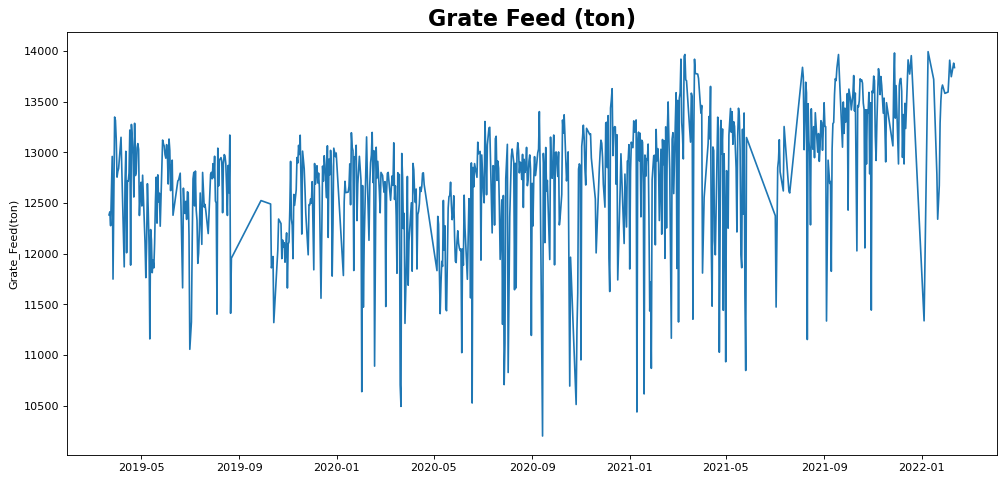

In [108]:
plt.figure(figsize=(15,7),dpi=80)
plt.title('Grate Feed (ton)', fontsize=20,fontweight='bold')
sns.lineplot(x=df.index, y=df['Grate_Feed(ton)'], data=df )

In [109]:
df.describe()

,Blane_before_hpgr,Blane_after_hpgr,MC%,Drop,710FN3_Damper(%),Water_Mix1(m3/h),Water_Mix2(m3/h),Kiln_Speed(rpm),710FN1_Damper(%),730FN1_Damper(%),Grate_Feed(ton),OffGas(deg),WF5(t/h),WF6(t/h),Grate_Speed(rpm),FeO,P_9-16_mm
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,1635.819622,1932.796759,9.045297,4.305250,43.052711,3.414092,3.467382,1.636224,54.261408,37.706789,12724.020684,854.612803,15.977539,16.211132,5.983566,0.877360,87.232661
std,126.097192,128.781296,0.174664,0.544648,4.725327,1.111138,1.191890,0.077343,5.374844,4.673814,654.588783,46.137030,5.652316,5.562067,0.414161,0.282179,1.905010
min,1278.400000,1584.900000,8.524658,2.943273,28.010000,0.540000,0.400000,1.350000,24.360000,30.050000,10201.320000,640.790000,0.000000,0.000000,4.740000,0.386667,81.032500
25%,1533.800000,1837.072917,8.929795,3.910598,39.685000,2.677500,2.680000,1.560000,50.342500,35.207500,12394.800000,819.867500,12.807500,13.012500,5.700000,0.678333,85.989455
50%,1644.250000,1922.050000,9.041381,4.288844,44.195000,3.445000,3.445000,1.660000,54.105000,36.535000,12821.255000,854.730000,17.160000,17.200000,5.960000,0.818750,87.313750
75%,1734.098485,2015.379167,9.162545,4.613678,46.695000,4.162500,4.240000,1.700000,57.985000,37.652500,13128.305000,886.987500,20.172500,20.162500,6.290000,1.000208,88.537159
max,1918.300000,2288.666667,9.681429,6.497568,53.210000,7.140000,7.390000,1.780000,69.780000,50.480000,13995.260000,973.740000,28.200000,27.980000,6.930000,2.739286,93.064167
